Exercise 3 

In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph


In [2]:
class AgetState(TypedDict):
    name: str
    age: str
    skills: list
    final_result: str

In [3]:
def first_node(state: AgetState) -> AgetState:
    """This is the first node in the graph. This node will grab the user's name."""
    
    state['final_result'] = f"{state['name']} welcome to the Aget Graph!"
    return state

def second_node(state: AgetState) -> AgetState:
    """This is the second node in the graph. This node will grab the user's age."""
    
    state['final_result'] += f" You are {state['age']} years old."
    return state

def third_node(state: AgetState) -> AgetState:
    """This is the third node in the graph. This node will grab the user's skills."""
    
    skills = ', '.join(state['skills'])
    state['final_result'] += f" Your skills are: {skills}."
    return state

In [8]:
stateGraph = StateGraph(AgetState)

stateGraph.add_node("personal_info", first_node)
stateGraph.add_node("age_info", second_node)
stateGraph.add_node("skills_info", third_node)

stateGraph.set_entry_point("personal_info")
stateGraph.add_edge("personal_info", "age_info")
stateGraph.add_edge("age_info", "skills_info")
stateGraph.set_finish_point("skills_info")

app = stateGraph.compile()

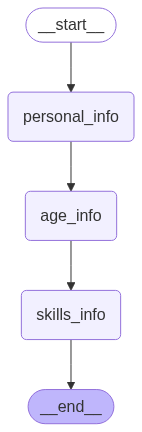

In [9]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [11]:
result = app.invoke(
    {"name": "Ajay", "age": "30", "skills": ["Python", "Data Science", "Machine Learning"]},
)

In [12]:
result["final_result"]  # This will contain the final result of the graph execution

'Ajay welcome to the Aget Graph! You are 30 years old. Your skills are: Python, Data Science, Machine Learning.'